### Load a model

In [1]:
from fastai2.vision.all import *
from fastai2.basics import *
from torchvision.models import vgg19, vgg16
from PIL import Image


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from imports.suttstyle import StyleImport

In [4]:
s = StyleImport()

In [5]:
_ = s.build_feats()

success!
b''


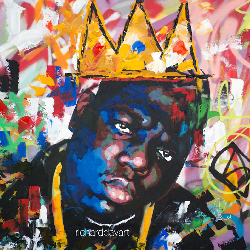

In [11]:
url = 'https://i.etsystatic.com/10833428/r/il/13b4f7/1296586152/il_794xN.1296586152_2sl7.jpg'
ret = s.pull_style_target(url, 'biggie_1.jpg')

style_img = Image.open(ret)
style_img.resize((250,250))

In [12]:
loss_func = s.build_loss_func(style_fn = 'biggie_1.jpg')
tnet = s.build_arch()

In [13]:
path = untar_data(URLs.COCO_SAMPLE)

dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(0.1, seed=42),
                   item_tfms=[Resize(224)],
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(path, bs=4)

# dls.show_batch()

In [14]:
learn = Learner(dls, tnet, loss_func=loss_func)

In [16]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,time
0,12.285495,12.347014,21:56


In [17]:
learn.save('biggie1_stage1')

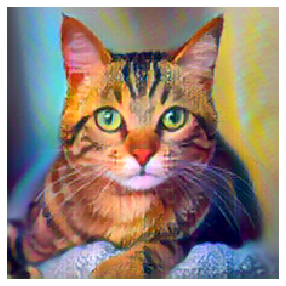

In [18]:
pred_img2 = learn.predict('cat.jpg')
pred_img2[0].show()

In [29]:
# url_biggie_photo = '''https://cdn.vox-cdn.com/thumbor/cGfKXADbJ127i5dXUuQuq3-lRnQ=/0x0:1200x675/1200x800/filters:focal(478x185:670x377)/cdn.vox-cdn.com/uploads/chorus_image/image/53603927/big.1489015066.png'''
url_biggie_photo = 'https://www.biography.com/.image/t_share/MTQ3Mzg2NDU3NDMzMDU2OTUx/biggie_smalls_photo_by_clarence_davis_new_york_daily_news_archive_getty_97348258.jpg'

# !wget {url} -O 'style.jpg'
!wget {url_biggie_photo} -O 'biggie_photo.jpg'

--2020-02-17 23:45:02--  https://www.biography.com/.image/t_share/MTQ3Mzg2NDU3NDMzMDU2OTUx/biggie_smalls_photo_by_clarence_davis_new_york_daily_news_archive_getty_97348258.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.66.98, 151.101.2.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204770 (200K) [image/jpeg]
Saving to: ‘biggie_photo.jpg’

biggie_photo.jpg    100%[===================>] 199.97K  --.-KB/s    in 0.04s   

2020-02-17 23:45:02 (4.89 MB/s) - ‘biggie_photo.jpg’ saved [204770/204770]



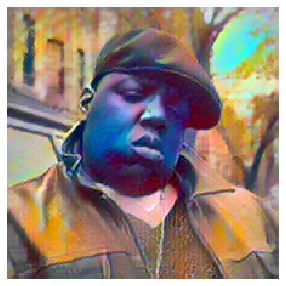

In [31]:
pred_img = learn.predict('biggie_photo.jpg')
pred_img[0].show()

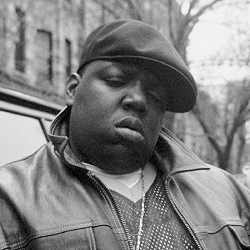

In [37]:
Image.open('biggie_photo.jpg').resize((250,250))